## Association Analysis based on Whole Retailer Data

#### Data Exploration

In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.plotly as py
from sklearn.model_selection import train_test_split
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [2]:
retail_data = pd.read_excel('online_retail.xlsx')

In [4]:
retail_data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [3]:
##number of unique customers
len(retail_data['CustomerID'].unique())

4373

In [4]:
##number of unique stock code
len(retail_data['StockCode'].unique())

4070

In [5]:
retail_data['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [6]:
##number of unique invoice
len(retail_data['InvoiceNo'].unique())

25900

In [7]:
retail_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null datetime64[ns]
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [8]:
##unique description, to compare with number of unique stock code
len(retail_data['Description'].unique())

4224

In [31]:
##catch the difference in description while having the same stock code
retail_data.groupby(['StockCode','Description']).agg(np.size)

InvoiceNo  Quantity  \
StockCode    Description                                                
10002        INFLATABLE POLITICAL GLOBE                  71        71   
10080        GROOVY CACTUS INFLATABLE                    22        22   
             check                                        1         1   
10120        DOGGY RUBBER                                30        30   
10125        MINI FUNKY DESIGN TAPES                     94        94   
10133        COLOURING PENCILS BROWN TUBE               199       199   
             damaged                                      1         1   
10135        COLOURING PENCILS BROWN TUBE               180       180   
11001        ASSTD DESIGN RACING CAR PEN                120       120   
15030        FAN BLACK FRAME                             13        13   
15034        PAPER POCKET TRAVELING FAN                 142       142   
15036        ASSORTED COLOURS SILK FAN                  523       523   
15039        SANDALWOOD FAN                             149       149   
16008        SMALL FOLDING SCISSOR(POINTED EDGE)         70        70   
             check                                        1         1   
16010        FOLDING CAMPING SCISSOR W/KNIF & S           3         3   
16011        ANIMAL STICKERS                             47        47   
16012        FOOD/DRINK SPONGE STICKERS                  37        37   
16014        SMALL CHINESE STYLE SCISSOR                 54        54   
16015        MEDIUM CHINESE STYLE SCISSOR                24        24   
16016        LARGE CHINESE STYLE SCISSOR                 65        65   
16033        MINI HIGHLIGHTER PENS                        4         4   
16043        POP ART PUSH DOWN RUBBER                     2         2   
16045        POPART WOODEN PENCILS ASST                  69        69   
             check                                        1         1   
16046        TEATIME PEN CASE & PENS                     17        17   
16048        TEATIME ROUND PENCIL SHARPENER              69        69   
16049        TEATIME GEL PENS ASST                        5         5   
16052        TEATIME PUSH DOWN RUBBER                    13        13   
16054        POPART RECT PENCIL SHARPENER ASST           34        34   
...                                                     ...       ...   
AMAZONFEE    AMAZON FEE                                  34        34   
B            Adjust bad debt                              3         3   
BANK CHARGES Bank Charges                                37        37   
C2           CARRIAGE                                   143       143   
CRUK         CRUK Commission                             16        16   
D            Discount                                    77        77   
DCGS0003     BOXED GLASS ASHTRAY                          4         4   
             ebay                                         1         1   
DCGS0004     HAYNES CAMPER SHOULDER BAG                   1         1   
DCGS0067     ebay                                         1         1   
DCGS0068     ebay                                         1         1   
DCGS0069     OOH LA LA DOGS COLLAR                        1         1   
             ebay                                         1         1   
DCGS0070     CAMOUFLAGE DOG COLLAR                        1         1   
DCGS0073     ebay                                         1         1   
DCGS0076     SUNJAR LED NIGHT NIGHT LIGHT                 2         2   
DCGSSBOY     BOYS PARTY BAG                              11        11   
DCGSSGIRL    GIRLS PARTY BAG                             13        13   
DOT          DOTCOM POSTAGE                             709       709   
M            Manual                                     571       571   
PADS         PADS TO MATCH ALL CUSHIONS                   4         4   
POST         POSTAGE                                   1252      1252   
S            SAMPLES               

In [9]:
retail_data.groupby(['Description'])['Quantity'].mean()

Description
20713                                  -400.000000
 4 PURPLE FLOCK DINNER CANDLES            3.512195
 50'S CHRISTMAS GIFT BAG LARGE           14.715385
 DOLLY GIRL BEAKER                       13.524862
 I LOVE LONDON MINI BACKPACK              4.420455
 I LOVE LONDON MINI RUCKSACK              1.000000
 NINE DRAWER OFFICE TIDY                  1.735294
 OVAL WALL MIRROR DIAMANTE                1.438272
 RED SPOT GIFT BAG LARGE                 16.447619
 SET 2 TEA TOWELS I LOVE LONDON           9.861702
 SPACEBOY BABY GIFT SET                   2.622340
 TOADSTOOL BEDSIDE LIGHT                  2.000000
 TRELLIS COAT RACK                        3.896552
*Boombox Ipod Classic                     1.000000
*USB Office Mirror Ball                   1.000000
10 COLOUR SPACEBOY PEN                   19.547401
12 COLOURED PARTY BALLOONS               12.558824
12 DAISY PEGS IN WOOD BOX                 4.154762
12 EGG HOUSE PAINTED WOOD                 1.480000
12 HANGING EGGS HAN

#### Data Cleaning

In [10]:
###Removing trailing spaces
retail_data['Description'] = retail_data['Description'].str.strip()

In [13]:
##Checking for nulls 
#retail_data['InvoiceNo'].isnull().values.any()
#retail_data['InvoiceNo'].isnull().sum().sum()
#retail_data['InvoiceNo'].isna().values.any()
retail_data.dropna(axis = 0,subset = ['InvoiceNo'] , inplace = True)
retail_data.dropna(axis = 0,subset = ['Description'] , inplace = True)

In [14]:
retail_data.InvoiceNo = retail_data.InvoiceNo.astype(str)
len(retail_data)

540454

In [21]:
retail_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 531166 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      531166 non-null object
StockCode      531166 non-null object
Description    531166 non-null object
Quantity       531166 non-null int64
InvoiceDate    531166 non-null datetime64[ns]
UnitPrice      531166 non-null float64
CustomerID     397924 non-null float64
Country        531166 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 36.5+ MB


In [18]:
##remove the invoice number that contain C (Credit invoice)
retail_data = retail_data.loc[~retail_data['InvoiceNo'].str.contains("C")]

In [19]:
retail_data.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

#### Data Preperation

In [20]:
###Data Preperation
pd.get_dummies(retail_data, columns=["Description"])

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Description_*Boombox Ipod Classic,Description_*USB Office Mirror Ball,Description_10 COLOUR SPACEBOY PEN,...,Description_wrongly coded 20713,Description_wrongly coded 23343,Description_wrongly coded-23343,Description_wrongly marked,Description_wrongly marked 23343,Description_wrongly marked carton 22804,Description_wrongly marked. 23343 in box,Description_wrongly sold (22719) barcode,Description_wrongly sold as sets,Description_wrongly sold sets
0,536365,85123A,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,536365,71053,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,536365,84406B,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,536365,84029G,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,536365,84029E,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,536365,22752,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,536365,21730,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,536366,22633,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,536366,22632,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,536367,84879,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [102]:
##Summarize the data by aggregating on Country, Invoice and Description
##And then pivot the dataframe to implemnet hot encoded method

Agg_data = pd.DataFrame(retail_data.groupby(['Country','InvoiceNo','Description'])['Quantity'].sum().unstack().reset_index().fillna(0).set_index('InvoiceNo'))
Agg_data_france = Agg_data[Agg_data['Country'] == 'France'].drop(columns = ['Country'])


In [103]:
Agg_data_france

Description,*Boombox Ipod Classic,*USB Office Mirror Ball,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 HANGING EGGS HAND PAINTED,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,...,wrongly coded 20713,wrongly coded 23343,wrongly coded-23343,wrongly marked,wrongly marked 23343,wrongly marked carton 22804,wrongly marked. 23343 in box,wrongly sold (22719) barcode,wrongly sold as sets,wrongly sold sets
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536370,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536852,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536974,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537065,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537463,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537468,0.0,0.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537693,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537897,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537967,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [110]:
##Turn the description variables to 0,1
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1
    

basket_sets = Agg_data_france.applymap(encode_units)
basket_sets

Description,*Boombox Ipod Classic,*USB Office Mirror Ball,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 HANGING EGGS HAND PAINTED,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,...,wrongly coded 20713,wrongly coded 23343,wrongly coded-23343,wrongly marked,wrongly marked 23343,wrongly marked carton 22804,wrongly marked. 23343 in box,wrongly sold (22719) barcode,wrongly sold as sets,wrongly sold sets
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536370,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536852,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536974,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537065,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537463,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537468,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537693,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537897,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537967,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Model Phase

In [111]:
frequent_itemsets = apriori(basket_sets, min_support=0.07, use_colnames=True)

In [112]:
frequent_itemsets

,support,itemsets
0,0.071429,[4 TRADITIONAL SPINNING TOPS]
1,0.096939,[ALARM CLOCK BAKELIKE GREEN]
2,0.102041,[ALARM CLOCK BAKELIKE PINK]
3,0.094388,[ALARM CLOCK BAKELIKE RED]
4,0.081633,[BAKING SET 9 PIECE RETROSPOT]
5,0.071429,[CHILDRENS CUTLERY DOLLY GIRL]
6,0.099490,[DOLLY GIRL LUNCH BOX]
7,0.096939,[JUMBO BAG RED RETROSPOT]
8,0.076531,[JUMBO BAG WOODLAND ANIMALS]
9,0.125000,[LUNCH BAG APPLE DESIGN]


In [115]:
##
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head()

,antecedants,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ALARM CLOCK BAKELIKE PINK),(ALARM CLOCK BAKELIKE GREEN),0.102041,0.096939,0.073980,0.725000,7.478947,0.064088,3.283859
1,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE PINK),0.096939,0.102041,0.073980,0.763158,7.478947,0.064088,3.791383
2,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE GREEN),0.094388,0.096939,0.079082,0.837838,8.642959,0.069932,5.568878
3,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.096939,0.094388,0.079082,0.815789,8.642959,0.069932,4.916181
4,(POSTAGE),(ALARM CLOCK BAKELIKE GREEN),0.765306,0.096939,0.084184,0.110000,1.134737,0.009996,1.014676


In [117]:
rules['lift'].max()
rules['lift'].min()

1.0008510638297874

(array([74.,  0.,  2., 10.,  6.,  8., 12., 12., 10.,  6.]),
 array([1.00085106, 1.79970126, 2.59855145, 3.39740164, 4.19625183,
        4.99510203, 5.79395222, 6.59280241, 7.3916526 , 8.1905028 ,
        8.98935299]),
 <a list of 10 Patch objects>)

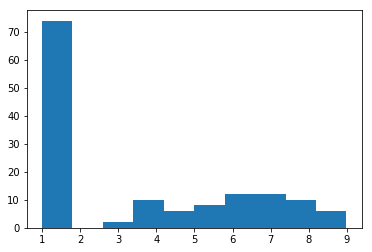

In [123]:
plt.hist(rules['lift'])

(array([33.,  4.,  0.,  1.,  6., 13., 11., 31., 30., 11.]),
 array([0.09333333, 0.184     , 0.27466667, 0.36533333, 0.456     ,
        0.54666667, 0.63733333, 0.728     , 0.81866667, 0.90933333,
        1.        ]),
 <a list of 10 Patch objects>)

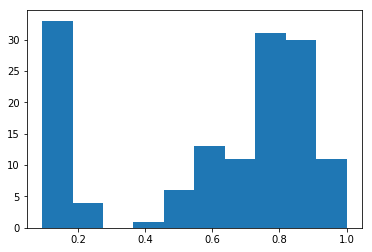

In [124]:
plt.hist(rules['confidence'])

(array([24., 56., 12., 22., 12.,  4.,  0.,  2.,  4.,  4.]),
 array([0.07142857, 0.08086735, 0.09030612, 0.0997449 , 0.10918367,
        0.11862245, 0.12806122, 0.1375    , 0.14693878, 0.15637755,
        0.16581633]),
 <a list of 10 Patch objects>)

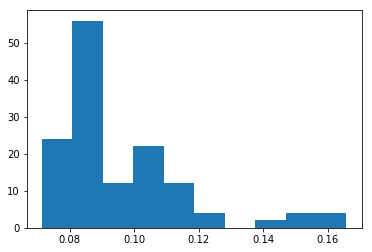

In [125]:
plt.hist(rules['support'])

In [126]:
rules[rules['lift'] > 6]

,antecedants,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ALARM CLOCK BAKELIKE PINK),(ALARM CLOCK BAKELIKE GREEN),0.102041,0.096939,0.073980,0.725000,7.478947,0.064088,3.283859
1,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE PINK),0.096939,0.102041,0.073980,0.763158,7.478947,0.064088,3.791383
2,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE GREEN),0.094388,0.096939,0.079082,0.837838,8.642959,0.069932,5.568878
3,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.096939,0.094388,0.079082,0.815789,8.642959,0.069932,4.916181
6,(ALARM CLOCK BAKELIKE PINK),(ALARM CLOCK BAKELIKE RED),0.102041,0.094388,0.073980,0.725000,7.681081,0.064348,3.293135
7,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE PINK),0.094388,0.102041,0.073980,0.783784,7.681081,0.064348,4.153061
74,(SET/6 RED SPOTTY PAPER PLATES),(SET/20 RED RETROSPOT PAPER NAPKINS),0.127551,0.132653,0.102041,0.800000,6.030769,0.085121,4.336735
75,(SET/20 RED RETROSPOT PAPER NAPKINS),(SET/6 RED SPOTTY PAPER PLATES),0.132653,0.127551,0.102041,0.769231,6.030769,0.085121,3.780612
76,(SET/6 RED SPOTTY PAPER CUPS),(SET/6 RED SPOTTY PAPER PLATES),0.137755,0.127551,0.122449,0.888889,6.968889,0.104878,7.852041
77,(SET/6 RED SPOTTY PAPER PLATES),(SET/6 RED SPOTTY PAPER CUPS),0.127551,0.137755,0.122449,0.960000,6.968889,0.104878,21.556122


In [131]:
##Germany
Agg_data_Germany = Agg_data[Agg_data['Country'] == 'Germany'].drop(columns = ['Country'])

##Turn the description variables to 0,1
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1
    

basket_sets_2 = Agg_data_Germany.applymap(encode_units)
basket_sets_2

frequent_itemsets_2 = apriori(basket_sets_2, min_support=0.07, use_colnames=True)

rules_2 = association_rules(frequent_itemsets_2, metric="lift", min_threshold=1)



(array([24.,  0.,  0.,  0.,  2.,  0.,  0.,  2.,  0.,  6.]),
 array([1.02752795, 1.2760292 , 1.52453045, 1.7730317 , 2.02153295,
        2.2700342 , 2.51853545, 2.7670367 , 3.01553795, 3.2640392 ,
        3.51254045]),
 <a list of 10 Patch objects>)

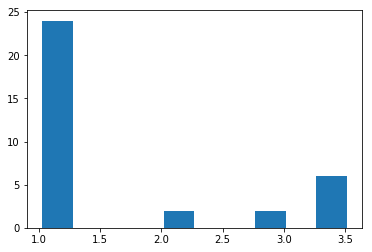

In [132]:
plt.hist(rules_2['lift'])

(array([33.,  4.,  0.,  1.,  6., 13., 11., 31., 30., 11.]),
 array([0.09333333, 0.184     , 0.27466667, 0.36533333, 0.456     ,
        0.54666667, 0.63733333, 0.728     , 0.81866667, 0.90933333,
        1.        ]),
 <a list of 10 Patch objects>)

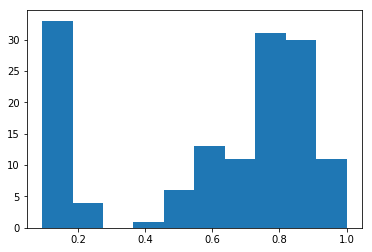

In [133]:
plt.hist(rules['confidence'])

In [135]:
rules_2[rules_2['lift'] > 3]

,antecedants,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
24,(ROUND SNACK BOXES SET OF4 WOODLAND),(ROUND SNACK BOXES SET OF 4 FRUITS),0.245077,0.157549,0.131291,0.535714,3.400298,0.092679,1.814509
25,(ROUND SNACK BOXES SET OF 4 FRUITS),(ROUND SNACK BOXES SET OF4 WOODLAND),0.157549,0.245077,0.131291,0.833333,3.400298,0.092679,4.529540
29,"(ROUND SNACK BOXES SET OF4 WOODLAND, POSTAGE)",(ROUND SNACK BOXES SET OF 4 FRUITS),0.225383,0.157549,0.124726,0.553398,3.512540,0.089218,1.886357
30,"(ROUND SNACK BOXES SET OF 4 FRUITS, POSTAGE)",(ROUND SNACK BOXES SET OF4 WOODLAND),0.150985,0.245077,0.124726,0.826087,3.370730,0.087724,4.340810
31,(ROUND SNACK BOXES SET OF4 WOODLAND),"(ROUND SNACK BOXES SET OF 4 FRUITS, POSTAGE)",0.245077,0.150985,0.124726,0.508929,3.370730,0.087724,1.728904
32,(ROUND SNACK BOXES SET OF 4 FRUITS),"(ROUND SNACK BOXES SET OF4 WOODLAND, POSTAGE)",0.157549,0.225383,0.124726,0.791667,3.512540,0.089218,3.718162
